In [1]:
import numpy as np

import scipy as sp
from scipy.io import loadmat
from scipy.stats import multivariate_normal

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import NonUniformImage
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

# 1 Anomaly Detection

In [2]:
anomalyfile_path = '../course_materials/ex8data1.mat'
anomalyData = loadmat(anomalyfile_path)
print(anomalyData.keys())
print(anomalyData['X'].shape)
print(anomalyData['Xval'].shape)
print(anomalyData['yval'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
(307, 2)
(307, 2)
(307, 1)


<function matplotlib.pyplot.show(*args, **kw)>

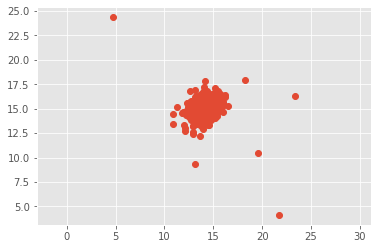

In [3]:
anomalyX = anomalyData['X']
plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o')
plt.axis('equal')
plt.show

## 1.1 Multivariate Gaussian Distribution
### 1.1.1 Univariate Gaussian Distribution
$p(x; \mu, \sigma ^2) = \frac{1}{\sqrt{2\pi}\cdot\sigma}exp\Big({-\frac{(x-\mu)^2}{2\sigma^2}}\Big)$, where<br />
$\sigma$ is variance.<br />

### 1.1.2 Multivariate Gaussian Distribution
$p(x; \mu, \Sigma) = \frac{1}{{(2\pi)^{n/2}}\cdot{|\Sigma|^{1/2}}}exp\Big(-\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T\Big)$, where<br />
$\Sigma$ is a covariance matrix (size $k\times k$);<br />
$|\Sigma|$ is the determinant of a covariance matrix $\Sigma$<br />

In [4]:
def gaussianParameter(X):
    return np.mean(X, axis=0), np.cov(X.T)

def gaussianDistribution(X):
    mu, Sigma = np.mean(X, axis=0), np.cov(X.T)
    detSigma = np.linalg.det(Sigma)
    

(307, 2)
(2,)
(2, 2)


<function matplotlib.pyplot.show(*args, **kw)>

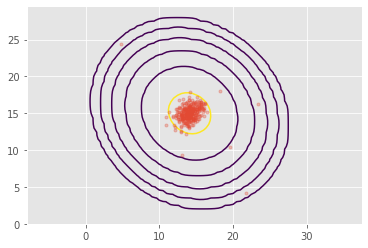

In [5]:
mu, Sigma = gaussianParameter(anomalyX)
print(anomalyX.shape)
print(mu.shape)
print(Sigma.shape)
# def plotMultGaussian():
plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o', markersize=3, alpha=.3)
minX = 0,30
maxX = 0,30
XX, YY = np.mgrid[0:30:.5, 0:30:.5]
XY = np.empty(XX.shape + (2,))
XY[:, :, 0] = XX
XY[:, :, 1] = YY
multivariateGaussian = multivariate_normal(mu, Sigma)
plt.contour(XX, YY, multivariateGaussian.pdf(XY), [10 ** a for a in range(-22,0,4)])
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

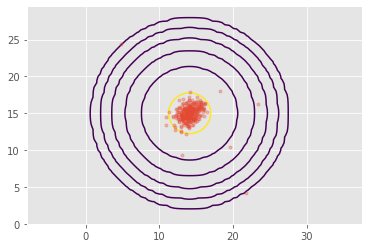

In [6]:
σ = np.diag(np.var(anomalyX, axis=0))

plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o', markersize=3, alpha=.3)
minX = 0,30
maxX = 0,30
XX, YY = np.mgrid[0:30:.5, 0:30:.5]
XY = np.empty(XX.shape + (2,))
XY[:, :, 0] = XX
XY[:, :, 1] = YY
multivariateGaussian_1 = multivariate_normal(mu, σ)
plt.contour(XX, YY, multivariateGaussian_1.pdf(XY), [10**a for a in range(-22,0,4)])
plt.axis('equal')
plt.show

## 1.2 Selecting Threshold for Anomaly Detection
### 1.2.1 Types of Errors & Accuracy, Precision, Recal

The rate **type I error** (false positives) is denoted by $\alpha$.<br />
The rate **type II error** (false negatives) is denoted by $\beta$.<br /><br />
**Accuracy** $= \frac {tP + tN}{tP + tN + fP + fN}$<br /><br />
**Precision** $= \frac {tP}{tP + fP}$<br /><br />
**Recall** $= \frac {tP}{tP + fN}$<br /><br />
**F** $= \frac {2\cdot Precision\cdot Recall}{Precision+Recall}$

2.6412223471848986e-21


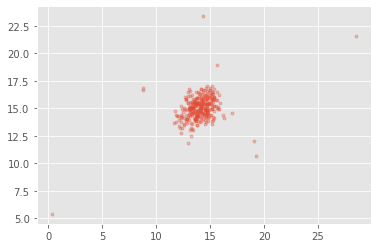

In [7]:
Xval = anomalyData['Xval']
yval = np.array(anomalyData['yval'], dtype=bool).flatten()
plt.plot(Xval[:,:1], Xval[:,1:], 'o', markersize=3, alpha=.3)
plt.show
multivariateGaussian = multivariate_normal(mu, Sigma)
pX = multivariateGaussian.pdf(anomalyX)
pXmin = np.min(pX)
print(pXmin)
pXmax = np.max(pX)
# print(pXmax)
# pXval = multivariateGaussian.pdf(Xval)

# nSteps = 1
# F_score = 0
# for epsylon in np.linspace(pXmin, pXmax, nSteps):
#     anomalyPrediction = pXval <= pXmax
# #     print (yval)
# #     print(yval.shape)
# #     print (anomalyPrediction)
# #     print(anomalyPrediction.shape)
#     tP = np.sum(yval*anomalyPrediction)
# #     print (tP)
#     print (yval-anomalyPrediction)
# #     fP = np.sum(yval-anomalyPrediction==-1)
# #     print (fP)
# #     fN = np.sum(yval-anomalyPrediction==1)
# #     print (fN)
# #     precision  = tP/(tP+fP)
# #     recall  = tP/(tP+fN)
# #     F_score = 2*precision*recall/(precision+recall)
# #     print(F_score)

# 2 Recommender System

In [8]:
moviefile_path = '../course_materials/ex8_movies.mat'
movieData = loadmat(moviefile_path)
print(movieData.keys())
print(movieData['Y'].shape)
print(movieData['R'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])
(1682, 943)
(1682, 943)


## 2.1 Data Visualisation
**movieRating** is a movie-rating matrix (1682, 943) — movies number and users number.<br\>
**movieRated** is a matrix of rated movies (1682, 943); movieRated(n,k) = 1 if user k gave a rating to movie n.<br\>
**NB** Strictly speaking, movieRated can be produced from movieRating usign simple operation (movieRating != 0).

In [9]:
movieRating = movieData['Y']
movieRated = movieData['R']
n_movies, n_users = movieRating.shape

print(np.array_equal(movieRated, movieRating != 0))

True


In [10]:
(np.ones(movieRating.shape)*5)*(movieRating != 0)

array([[5., 5., 0., ..., 5., 0., 0.],
       [5., 0., 0., ..., 0., 0., 5.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

'Toy Story' average rating 3.8783185840707963


Text(0.5, 0, 'Users')

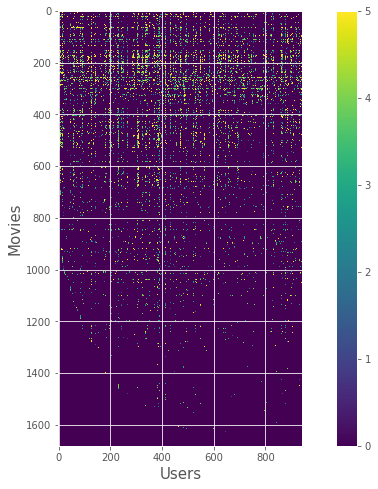

In [11]:
print ("'Toy Story' average rating", np.mean(movieRating[0,np.nonzero(movieRating[0,])]))
fig = plt.figure(figsize=(12, 8))
plt.imshow(movieRating)
plt.colorbar()
plt.ylabel("Movies", fontsize=15)
plt.xlabel("Users", fontsize=15)

## 2.2 Collaborative-Filtering Learning Algorithm

In [12]:
movieParametersfile_path = '../course_materials/ex8_movieParams.mat'
movieParameters = loadmat(movieParametersfile_path)
print(movieParameters.keys())
X = movieParameters['X']
β = movieParameters['Theta']
n_movies = int(movieParameters['num_movies'])
n_users = int(movieParameters['num_users'])
nFeatures = int(movieParameters['num_features'])
print(n_movies, n_users, nFeatures)
print(X.shape)
print(β.shape)


dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])
1682 943 10
(1682, 10)
(943, 10)


### 2.2.1 Collaborative-Filtering Cost Function
$J = \frac{1}{2}\sum{(X\cdot  \beta^T- y)^2}$

In [13]:
def flatten_βX(β, X):
    return np.concatenate((β.flatten(), X.flatten()))

def reshape_βX(βX, n_movies, n_users):
    splitβX = np.split(βX, [int(n_users*βX.size/(n_movies+n_users))])
    return(splitβX[0].reshape(n_users,-1), splitβX[1].reshape(n_movies,-1))

def get_hypothesis(β, X, Y):
#     for X(n,j), β(k,j), Y(n,k)
#     hypothesis matrix h(n,k)= X(n,j)*β.T(j,k)
#     to avoid bias, caused by including estimates for the movies, which have not been rated
    return np.multiply(np.dot(X,β.T), Y!=0)

def cost_function(βX, Y, n_movies, n_users, λ=.0):
    β, X = reshape_βX(βX, n_movies, n_users)
#     hypothesis matrix h(n,k)= X(n,j)*β.T(j,k)
    H = get_hypothesis(β, X, Y)
#     cost scalar J
    J = np.sum(np.square(H-Y))/2
#     regularisation term
    R = λ * (np.sum(np.square(β)) + np.sum(np.square(X)))/2    
    return J + R

### 2.2.2 Test Collaborative-Filtering Cost Function
You should expect to see an output of 22.22 (Andrew Ng)

In [14]:
testUsers = 4; testMovies = 5; testFeatures = 3
testX = X[:testMovies,:testFeatures]
testβ = β[:testUsers,:testFeatures]
testY = movieRating[:testMovies,:testUsers]

testβX = flatten_βX(testβ, testX)

print(cost_function(testβX, testY, testMovies, testUsers))
print(cost_function(testβX, testY, testMovies, testUsers, λ=1.5))

22.224603725685675
31.34405624427422


### 2.2.1 Collaborative-Filtering Gradient Function
$\frac{\partial J}{\partial x} = \sum{(X\cdot  \beta^T- y)\cdot\beta}$<br/>
$\frac{\partial J}{\partial \beta} = \sum{(X\cdot  \beta^T- y)\cdot x}$

In [15]:
def get_gradient(βX, Y, n_movies, n_users, λ=.0):
    β, X = reshape_βX(βX, n_movies, n_users)
#     hypothesis matrix h(n,k) = X(n,j)*β.T(j,k)
    H = get_hypothesis(β, X, Y)
    gβ = np.dot((H-Y).T, X)
    gX = np.dot(H-Y, β)
#     regularisation term
    gβ += λ*β
    gX += λ*X
    return flatten_βX(gβ, gX)

In [16]:
def testGradient(βX, Y, n_movies, n_users, λ=.0):
    print('Numerical Gradient \t Gradient \t\t Difference')
    
    Epsilon = 0.0001
    iGradient = get_gradient(βX, Y, n_movies, n_users, λ=.0)

    for i in np.random.choice(βX.size, 5, replace=False):
#         creat epsilon perturbation vector
        epsilon = np.zeros(βX.size)
        epsilon[i] = Epsilon
        negDelta = cost_function(βX-epsilon, Y, n_movies, n_users, λ=.0)
        posDelta = cost_function(βX+epsilon, Y, n_movies, n_users, λ=.0)
        newGradient = (posDelta-negDelta)/(2*Epsilon)
        print ('%0.15f \t %0.15f \t %0.15f' % (newGradient, iGradient[i],newGradient-iGradient[i]))


In [17]:
Y = movieRating
βX = flatten_βX(β, X)
testGradient(βX, Y, n_movies, n_users)

Numerical Gradient 	 Gradient 		 Difference
-1.363961309834849 	 -1.363961325195635 	 0.000000015360786
0.922087710932828 	 0.922087708011993 	 0.000000002920835
-0.898424841579981 	 -0.898424840046130 	 -0.000000001533851
0.002137639967259 	 0.002137597926783 	 0.000000042040476
-0.603337903157808 	 -0.603337897208128 	 -0.000000005949680


## 2.3 Learning Movie Recommendations

In [18]:
movieList = {}
with open('../course_materials/movie_ids.txt', 'r') as movieFile:
    for line in movieFile:
        movieList[int(line.strip('\n').split(' ')[0])-1] = ' '.join(line.strip('\n').split(' ')[1:])
        
testRating = np.zeros((Y.shape[0],1))
testRating[0]   = 4
testRating[97]  = 2
testRating[6]   = 3
testRating[11]  = 5
testRating[53]  = 4
testRating[63]  = 5
testRating[65]  = 3
testRating[68]  = 5
testRating[182] = 4
testRating[225] = 5
testRating[354] = 5
testRating.shape

(1682, 1)

In [19]:
# Add testRating to the movieRating (Y)
Y = np.hstack((Y, testRating))
n_movies, n_users = Y.shape
print(n_movies, n_users)

1682 944


In [20]:
Y - (Y.sum(1)/(Y != 0).sum(1)).reshape(-1,1)

array([[ 1.1214128 ,  0.1214128 , -3.8785872 , ..., -3.8785872 ,
        -3.8785872 ,  0.1214128 ],
       [-0.20610687, -3.20610687, -3.20610687, ..., -3.20610687,
         1.79389313, -3.20610687],
       [ 0.96666667, -3.03333333, -3.03333333, ..., -3.03333333,
        -3.03333333, -3.03333333],
       ...,
       [-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]])

In [21]:
def normaliseY(Y):
    # To avoid bias zeros are not taken into account
    meanY = Y.sum(1)/(Y != 0).sum(1)    
    return Y-meanY.reshape(-1,1), meanY.reshape(-1,1)

In [22]:
normalisedY, meanY = normaliseY(Y)
print(Y.shape)
print(meanY.shape)

(1682, 944)
(1682, 1)


In [23]:
# Generate random initial parameters, β and X
nFeatures = 10
X = np.random.rand(n_movies,nFeatures)
β = np.random.rand(n_users,nFeatures)
βX = flatten_βX(β, X)

# λ is set to 10 by Andrew Ng
λ = 10.

# cost_function optimisation
result = sp.optimize.fmin_cg(cost_function, x0=βX, fprime=get_gradient,
                                args=(Y, n_movies, n_users, λ),
                                maxiter=50,disp=True,full_output=True)

         Current function value: 73124.416094
         Iterations: 50
         Function evaluations: 73
         Gradient evaluations: 73


In [24]:
# Reshape the trained output into sensible "X" and "β" matrices
optβ, optX = reshape_βX(result[0], n_movies, n_users)
print(optX.shape)
print(optβ.shape)

(1682, 10)
(944, 10)


In [25]:
# After training the model, now make recommendations by computing
# the predictions matrix
predictionRating = np.dot(optX, optβ.T)
print(predictionRating[:,-1].shape)

(1682,)


In [26]:
# Grab the last user's predictions (since I put my predictions at the
# end of the Y matrix, not the front)
# Add back in the mean movie ratings
testPrediction = predictionRating[:,-1] + meanY.flatten()
# print(testPrediction)

In [27]:
# Sort my predictions from highest to lowest
predictionIndicesSorted = np.argsort(testPrediction)
predictionIndicesSorted[:] = predictionIndicesSorted[::-1]

print ("Top recommendations for you:")
for i in range(10):
    print ('Predicting rating %0.1f for movie %s.' %
           (testPrediction[predictionIndicesSorted[i]],movieList[predictionIndicesSorted[i]]))
    
print ("\nOriginal ratings provided:")
for i in range(len(testRating)):
    if testRating[i] > 0:
        print ('Rated %d for movie %s.' % (testRating[i],movieList[i]))

Top recommendations for you:
Predicting rating 8.4 for movie Star Wars (1977).
Predicting rating 8.4 for movie Shawshank Redemption, The (1994).
Predicting rating 8.3 for movie Titanic (1997).
Predicting rating 8.3 for movie Schindler's List (1993).
Predicting rating 8.2 for movie Raiders of the Lost Ark (1981).
Predicting rating 8.1 for movie Good Will Hunting (1997).
Predicting rating 8.1 for movie Usual Suspects, The (1995).
Predicting rating 8.0 for movie Wrong Trousers, The (1993).
Predicting rating 8.0 for movie Empire Strikes Back, The (1980).
Predicting rating 8.0 for movie Braveheart (1995).

Original ratings provided:
Rated 4 for movie Toy Story (1995).
Rated 3 for movie Twelve Monkeys (1995).
Rated 5 for movie Usual Suspects, The (1995).
Rated 4 for movie Outbreak (1995).
Rated 5 for movie Shawshank Redemption, The (1994).
Rated 3 for movie While You Were Sleeping (1995).
Rated 5 for movie Forrest Gump (1994).
Rated 2 for movie Silence of the Lambs, The (1991).
Rated 4 for m